## IMPORTING LIBRARIES

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## LOADING THE DATASET

In [18]:
dataset = pd.read_excel('Final_parameters_sublimation_glaciers.xlsx')
dataset.head()

,Log(Precipitation),qair-qsurf,log(ppt)*(q diff),sub values
0,-1.206222,-0.000008,0.000010,-0.000025
1,-2.240230,-0.000098,0.000219,-0.000221
2,-2.513050,-0.000131,0.000328,-0.000306
3,-5.872630,-0.000135,0.000791,-0.000427
4,-5.358657,-0.000084,0.000449,-0.000200


##  1) LINEAR REGRESSION MODEL

coefficients [[ 0.00000000e+00  5.39983331e-07 -1.45292006e-11]]


C:\Users\91939\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\91939\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


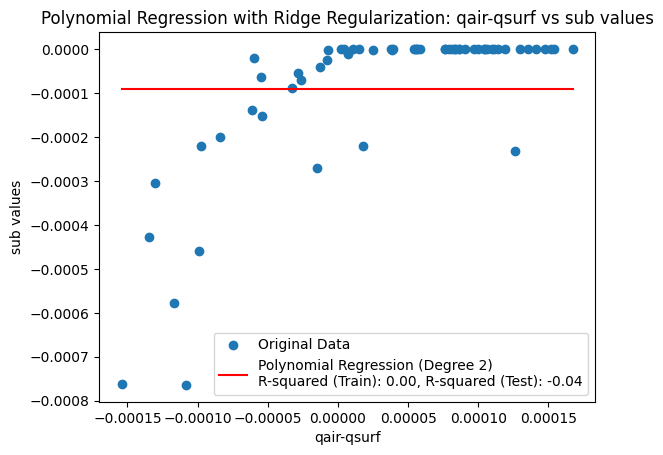

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Specify independent and dependent variables
independent_variable = 'qair-qsurf'
dependent_variable = 'sub values'

# Extract the data
X = dataset[["qair-qsurf"]]
y = dataset[["sub values"]]

# Transform the features into polynomial features
degree = 2  # You can change the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Create column names for polynomial features
poly_feature_names = [f"{independent_variable}^{i}" for i in range(degree + 1)]

# Create DataFrame with polynomial features and feature names
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=42)

# Create and fit the polynomial regression model with Ridge regularization
alpha = 1.0  # Regularization strength, you can adjust this parameter
ridge_regressor = Ridge(alpha=alpha)
ridge_regressor.fit(X_train, y_train)

# Predict the dependent variable on the transformed features
y_pred_train = ridge_regressor.predict(X_train)
y_pred_test = ridge_regressor.predict(X_test)

# Calculate R-squared for training and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

coefficients = ridge_regressor.coef_
print("coefficients", coefficients)

# Plot the original data
plt.scatter(X[independent_variable], y, label='Original Data')

# Plot the regression curve
X_plot = np.linspace(X[independent_variable].min(), X[independent_variable].max(), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = ridge_regressor.predict(X_plot_poly)

plt.plot(X_plot, y_plot, color='red', label=f'Polynomial Regression (Degree {degree})\nR-squared (Train): {r2_train:.2f}, R-squared (Test): {r2_test:.2f}')
plt.title(f'Polynomial Regression with Ridge Regularization: {independent_variable} vs {dependent_variable}')
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.legend()
plt.show()

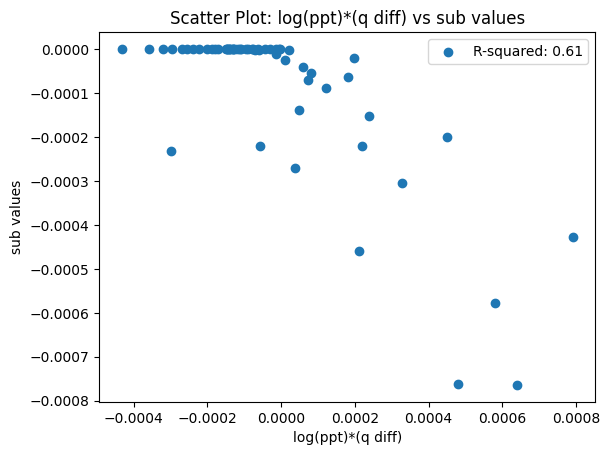

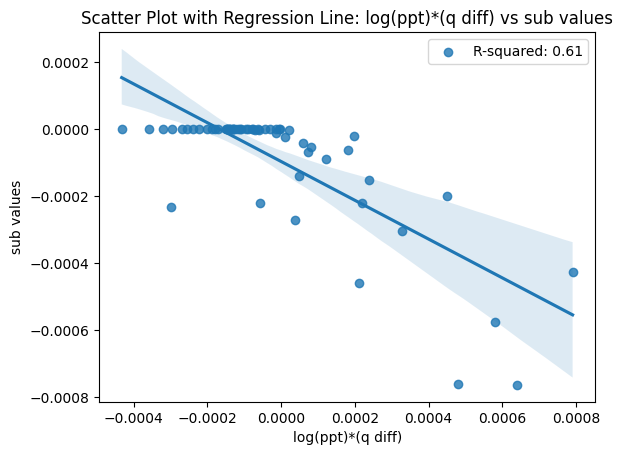

In [20]:
# defining x & y axes
X = dataset[["log(ppt)*(q diff)"]]
y = dataset[["sub values"]]

# Create and fit the linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Predict the dependent variable
y_pred = regressor.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Plot the scatter plot
plt.scatter(X, y, label=f'R-squared: {r2:.2f}')
plt.title(f'Scatter Plot: {"log(ppt)*(q diff)"} vs {"sub values"}')
plt.xlabel("log(ppt)*(q diff)")
plt.ylabel("sub values")
plt.legend()
plt.show()

# Optionally, use seaborn for a scatter plot with a regression line
sns.regplot(x="log(ppt)*(q diff)", y="sub values", data=dataset, label=f'R-squared: {r2:.2f}')
plt.title(f'Scatter Plot with Regression Line: {"log(ppt)*(q diff)"} vs {"sub values"}')
plt.legend()
plt.show()

## 2) POLYNOMIAL REGRESSION

coefficients [[ 0.00000000e+00 -3.62903518e-01 -1.85002102e+03 -1.03529871e+06
   3.88230265e+09]]


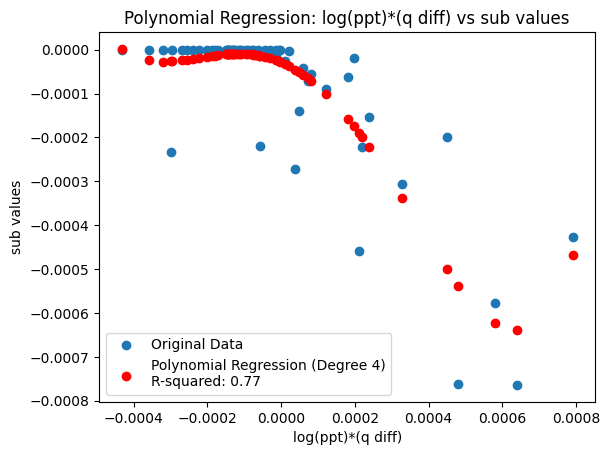

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Specify independent and dependent variables
independent_variable = 'log(ppt)*(q diff)'
dependent_variable = 'sub values'

# Extract the data
X = dataset[["log(ppt)*(q diff)"]]
y = dataset[["sub values"]]

# Transform the features into polynomial features
degree = 4  # You can change the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Create and fit the polynomial regression model
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)

# Predict the dependent variable on the transformed features
y_pred = poly_regressor.predict(X_poly)

# Calculate R-squared
r2 = r2_score(y, y_pred)

coefficients=poly_regressor.coef_
print("coefficients",coefficients)

# Plot the original data
plt.scatter(X, y, label='Original Data')

# Plot the regression curve
plt.scatter(X, y_pred, color='red', label=f'Polynomial Regression (Degree {degree})\nR-squared: {r2:.2f}')
plt.title(f'Polynomial Regression: {independent_variable} vs {dependent_variable}')
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.legend()
plt.show()

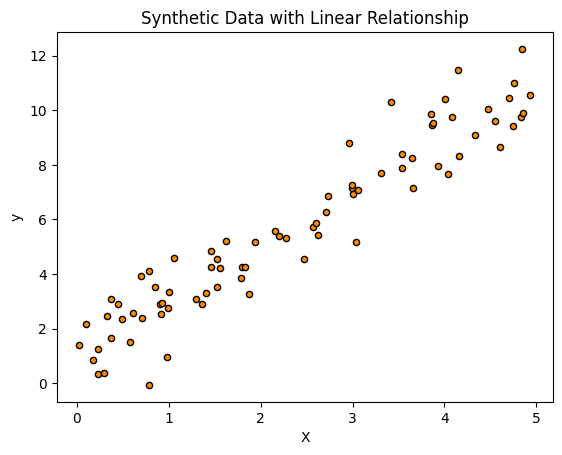

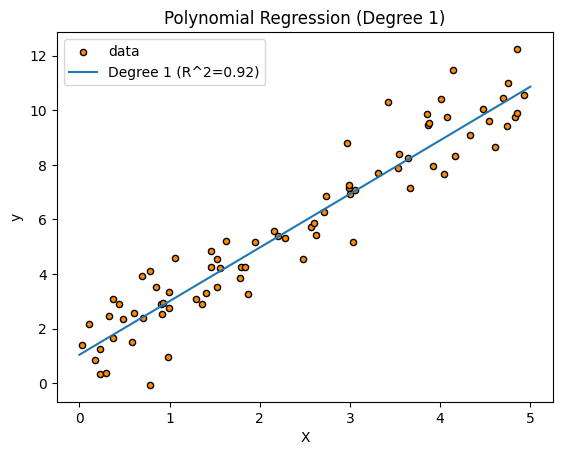

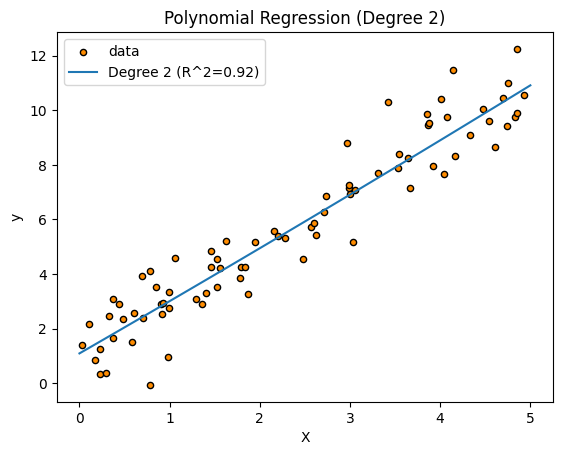

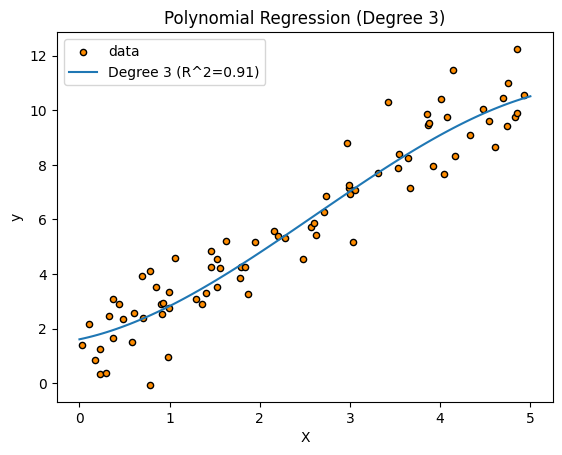

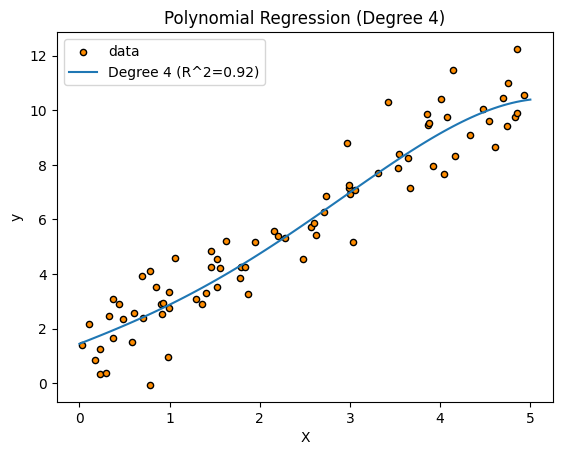

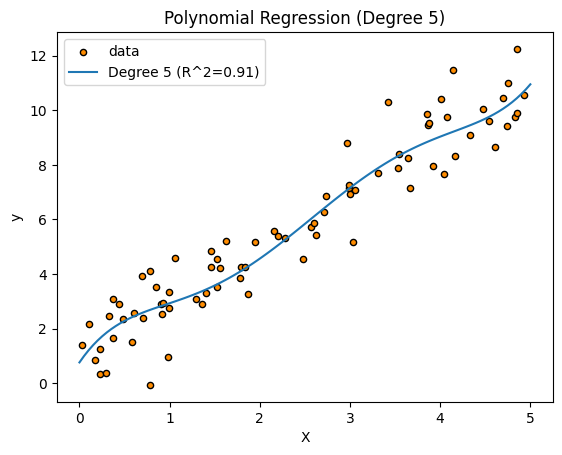

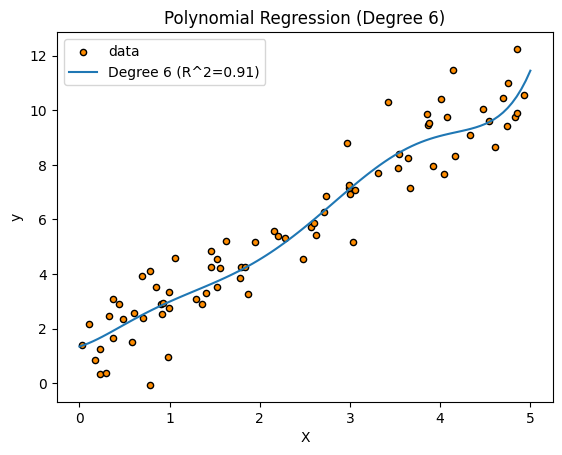

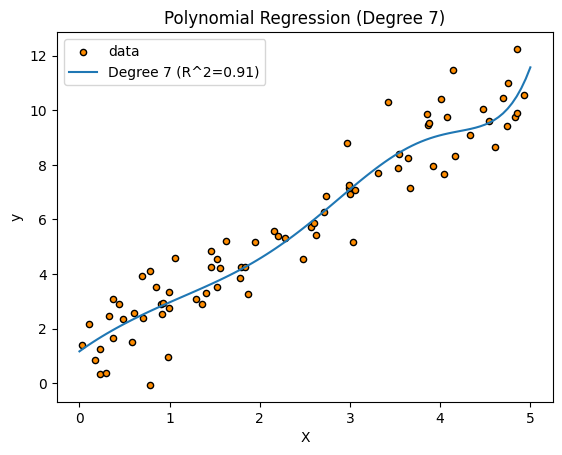

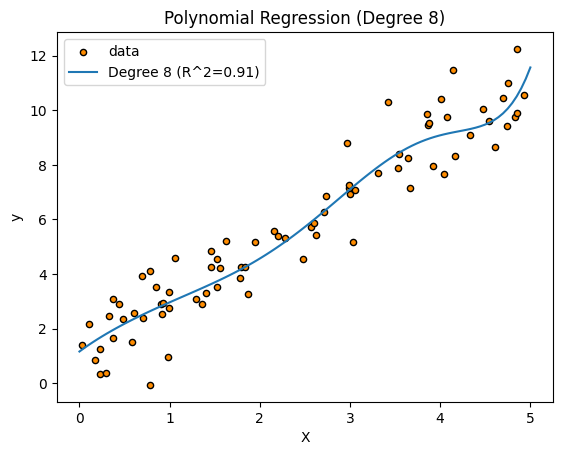

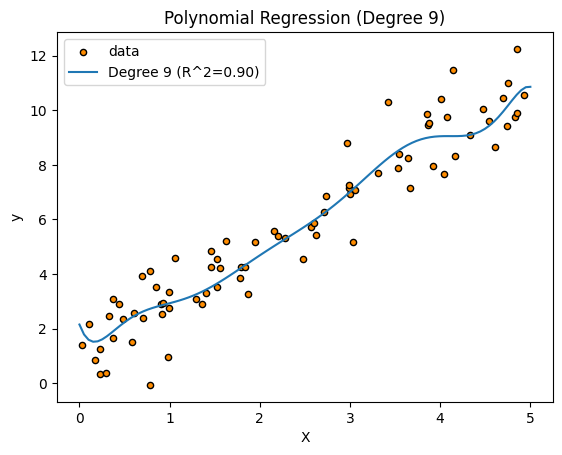

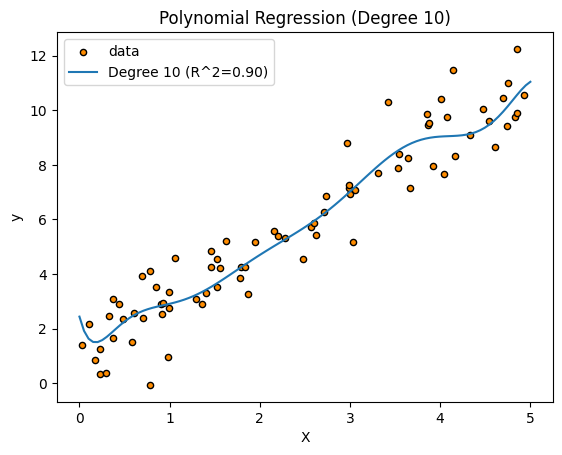

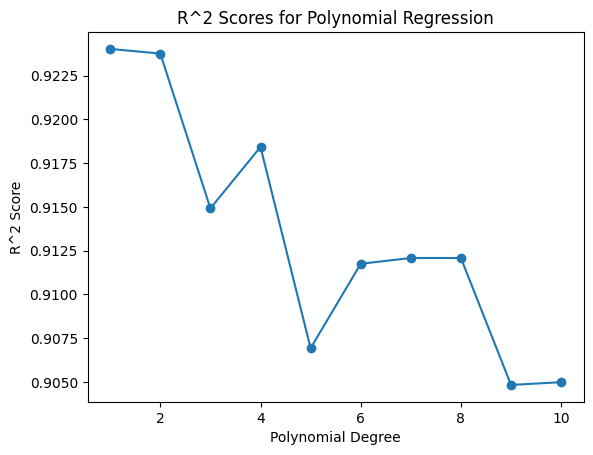

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = 2 * X.ravel() + 1 + np.random.normal(0, 1, X.shape[0])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the data
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.title("Synthetic Data with Linear Relationship")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Fit polynomial regression models with degrees 1 to 10
degrees = list(range(1, 11))
r2_scores = []

for degree in degrees:
    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Predict on the test set
    X_test_poly = poly.transform(X_test)
    y_pred = model.predict(X_test_poly)

    # Calculate R^2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Visualize the model
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
    plt.plot(X_plot, y_plot, label=f'Degree {degree} (R^2={r2:.2f})')
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Visualize the R^2 scores for different polynomial degrees
plt.plot(degrees, r2_scores, marker='o')
plt.title("R^2 Scores for Polynomial Regression")
plt.xlabel("Polynomial Degree")
plt.ylabel("R^2 Score")
plt.show()